In [3]:
import pandas as pd

df = pd.read_csv('../data/togo-dapaong_qc.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
missing_values = df.isna().sum()
missing_values_percent = (missing_values / len(df)) * 100
print(missing_values)
print(missing_values_percent)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [6]:
cols_more_than_5_percent_missing = missing_values_percent[missing_values_percent > 5]
print(cols_more_than_5_percent_missing)


Comments    100.0
dtype: float64


In [7]:
from scipy import stats
import numpy as np

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers_count = (z_scores > 3).sum(axis=0)
print(outliers_count)


[ 305 1062 3415  137  206 3510 3915]


In [8]:
df_clean = df[(z_scores < 3).all(axis=1)]

for col in cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)


C:\Users\saron\AppData\Local\Temp\ipykernel_28036\159890910.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
C:\Users\saron\AppData\Local\Temp\ipykernel_28036\159890910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(median_val, inplace=True)
C:\Users\saron\AppData\Loca

In [9]:
df_clean.to_csv('../data/togo_clean.csv', index=False)


C:\Users\saron\AppData\Local\Temp\ipykernel_28036\491328266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
C:\Users\saron\OneDrive\Desktop\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


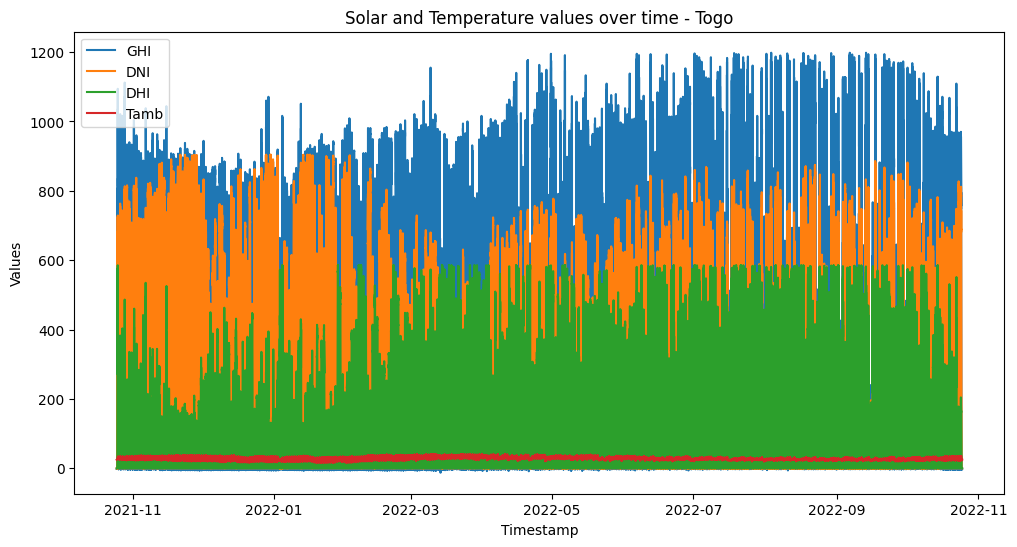

In [10]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Solar and Temperature values over time - Togo')
plt.show()


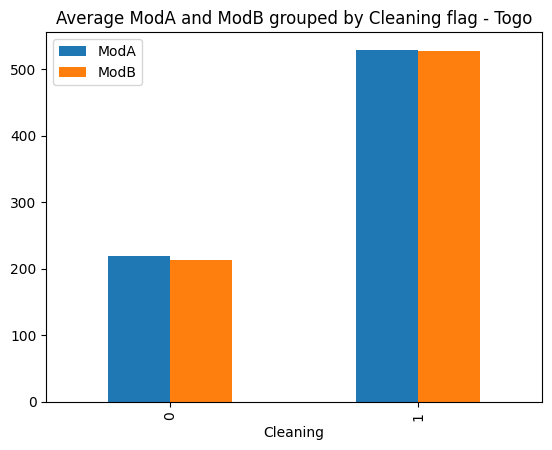

In [11]:
grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
grouped.plot(kind='bar')
plt.title('Average ModA and ModB grouped by Cleaning flag - Togo')
plt.show()


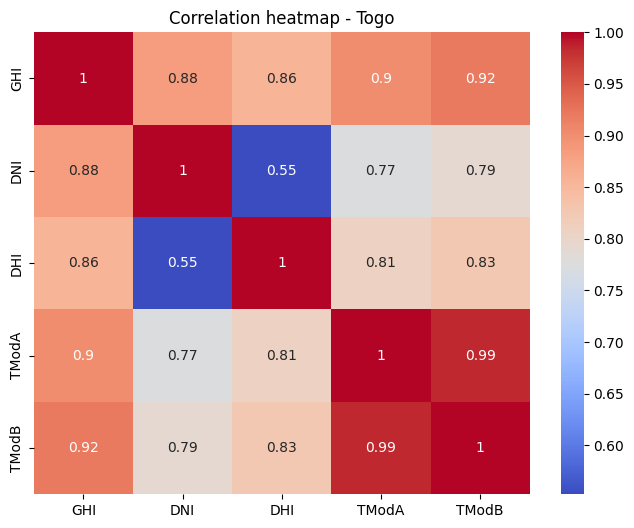

In [12]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap - Togo')
plt.show()


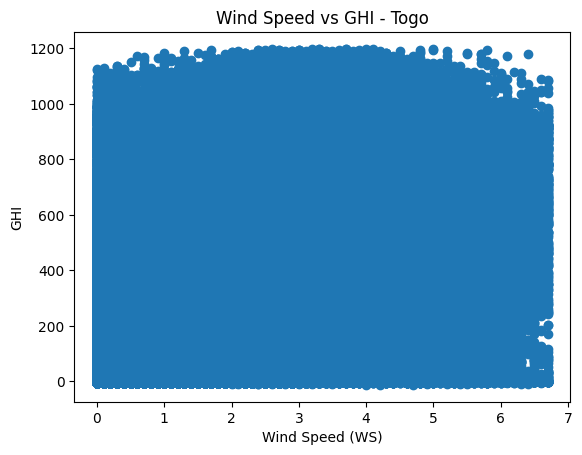

In [13]:
plt.scatter(df_clean['WS'], df_clean['GHI'])
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.title('Wind Speed vs GHI - Togo')
plt.show()




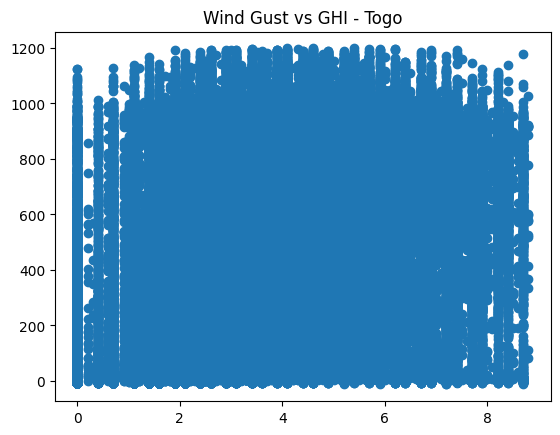

In [14]:
plt.scatter(df_clean['WSgust'], df_clean['GHI'])
plt.title('Wind Gust vs GHI - Togo')
plt.show()

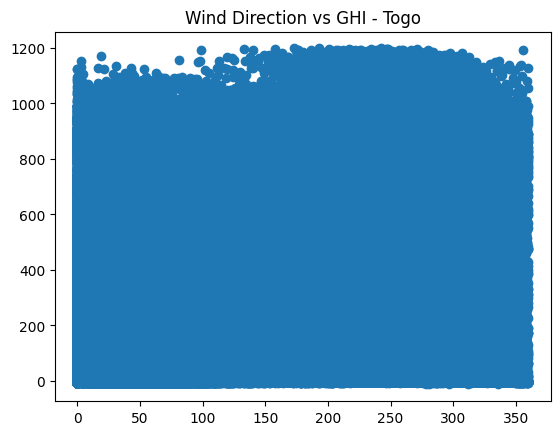

In [15]:
plt.scatter(df_clean['WD'], df_clean['GHI'])
plt.title('Wind Direction vs GHI - Togo')
plt.show()

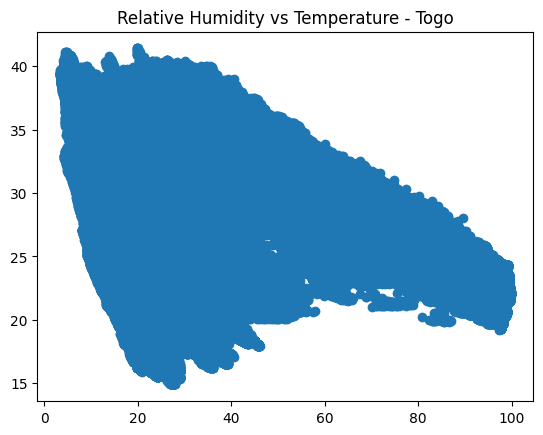

In [16]:
plt.scatter(df_clean['RH'], df_clean['Tamb'])
plt.title('Relative Humidity vs Temperature - Togo')
plt.show()

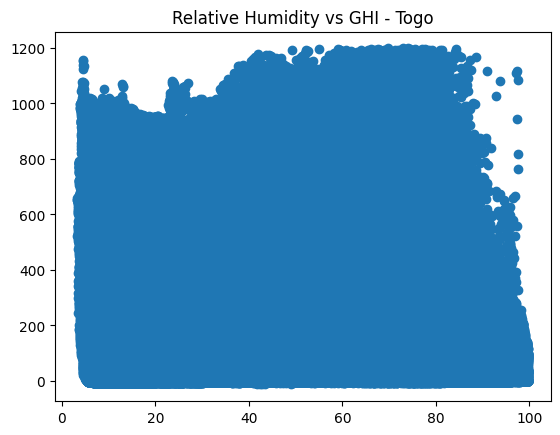

In [17]:
plt.scatter(df_clean['RH'], df_clean['GHI'])
plt.title('Relative Humidity vs GHI - Togo')
plt.show()

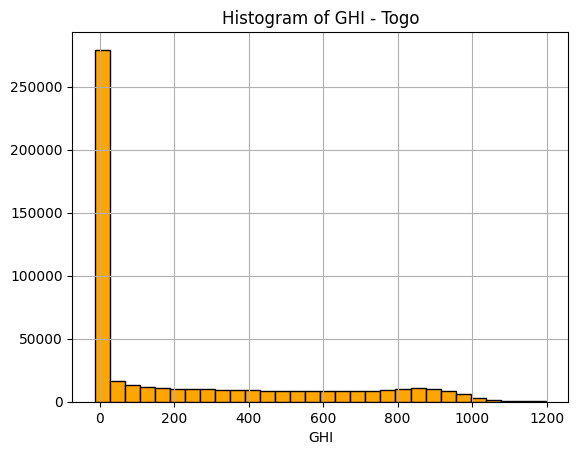

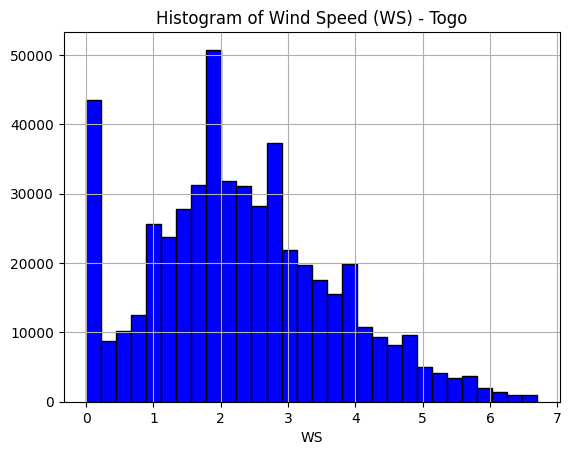

In [18]:
df_clean['GHI'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI - Togo')
plt.xlabel('GHI')
plt.show()

df_clean['WS'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS) - Togo')
plt.xlabel('WS')
plt.show()


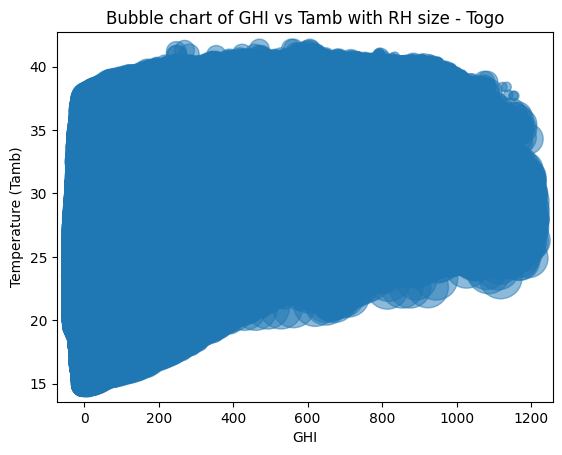

In [19]:
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('Bubble chart of GHI vs Tamb with RH size - Togo')
plt.show()
